# North American - Western European Trade

Analysis of produce trade between north america and western europe over the past 20 years.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df_trade = pd.read_pickle('../data/df_trade.pkl')
df_trade.head()

,Reporter Countries,Partner Countries,Item,Element,Unit,Y1993,Y1994,Y1995,Y1996,Y1997,...,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016
11,Afghanistan,Argentina,Maize,Import Quantity,tonnes,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,Afghanistan,Argentina,Maize,Import Value,1000 US$,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25,Afghanistan,Australia,"Anise, badian, fennel, coriander",Export Quantity,tonnes,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26,Afghanistan,Australia,"Anise, badian, fennel, coriander",Export Value,1000 US$,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27,Afghanistan,Australia,Apricots,Export Quantity,tonnes,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0


In [2]:
north_american_countries = ['United States of America', 'Canada', 'Mexico']
western_european_countries = ['Portugal', 'Spain', 'France', 'Italy', 'Germany', 'United Kingdom',
                             'Denmark', 'Ireland', 'Sweden', 'Netherlands', 'Belgium']

In [3]:
we_to_na = df_trade[(df_trade['Reporter Countries'].isin(north_american_countries)) &
                   (df_trade['Partner Countries'].isin(western_european_countries)) &
                   (df_trade['Element'] == 'Import Quantity')]
we_to_na.head()

,Reporter Countries,Partner Countries,Item,Element,Unit,Y1993,Y1994,Y1995,Y1996,Y1997,...,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016
759449,Canada,Belgium,"Anise, badian, fennel, coriander",Import Quantity,tonnes,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
759461,Canada,Belgium,Artichokes,Import Quantity,tonnes,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
759463,Canada,Belgium,Asparagus,Import Quantity,tonnes,0.0,0.0,0.0,0.0,0.0,...,1.0,2.0,1.0,2.0,4.0,3.0,1.0,1.0,1.0,1.0
759465,Canada,Belgium,Avocados,Import Quantity,tonnes,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
759471,Canada,Belgium,Bananas,Import Quantity,tonnes,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,4.0,0.0,0.0,0.0,0.0,0.0


In [4]:
na_to_we = df_trade[(df_trade['Reporter Countries'].isin(western_european_countries)) &
                   (df_trade['Partner Countries'].isin(north_american_countries)) &
                   (df_trade['Element'] == 'Import Quantity')]
na_to_we.head()

,Reporter Countries,Partner Countries,Item,Element,Unit,Y1993,Y1994,Y1995,Y1996,Y1997,...,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016
379677,Belgium,Canada,"Anise, badian, fennel, coriander",Import Quantity,tonnes,0.0,0.0,0.0,0.0,0.0,...,0.0,270.0,196.0,27.0,0.0,0.0,0.0,22.0,0.0,0.0
379679,Belgium,Canada,Apples,Import Quantity,tonnes,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
379691,Belgium,Canada,Barley,Import Quantity,tonnes,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0,0.0
379695,Belgium,Canada,"Beans, dry",Import Quantity,tonnes,0.0,0.0,0.0,0.0,0.0,...,1662.0,1600.0,1528.0,1742.0,1370.0,1194.0,1548.0,2075.0,5564.0,6402.0
379699,Belgium,Canada,"Beans, green",Import Quantity,tonnes,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
we_to_na = we_to_na[[f'Y{label}' for label in range(1993, 2017)]]
we_to_na = we_to_na.sum(axis=0)

In [6]:
na_to_we = na_to_we[[f'Y{label}' for label in range(1993, 2017)]]
na_to_we = na_to_we.sum(axis=0)

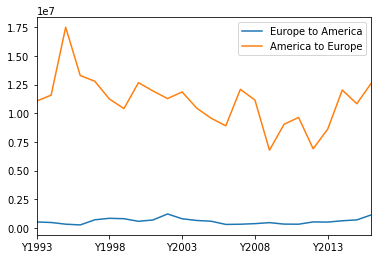

In [8]:
we_to_na.plot(label='Europe to America')
na_to_we.plot(label='America to Europe')
plt.legend()